In [1]:
import networkx as nx
import numpy as np
import math
import matplotlib as plt
import random

In [2]:
def rand_pts(tam_i, rand_min=0, rand_max=100):
    pts = []
    for i in range(2**tam_i):
        p = np.random.randint(rand_min, rand_max, 2)
        pts.append(p)
    return pts

In [3]:
def euclid_dist(pts):
    edges = []
    for i in range(len(pts)):
        for j in range(len(pts)):
            if i != j:
                edges.append([i, j, abs(np.linalg.norm(pts[i]-pts[j]))])
    return edges

In [4]:
def manhat_dist(pts):
    edges = []
    for i in range(len(pts)):
        for j in range(len(pts)):
            if i != j:
                edges.append([i, j, np.sum(np.abs(pts[i][0]-pts[j][0]))])
    return edges

In [5]:
def create_graph_manhat(pts):
    G = nx.Graph()
    edges = manhat_dist(pts)
    G.add_weighted_edges_from(edges)
    return G

In [6]:
def create_graph_euclid(pts):
    G = nx.Graph()
    edges = euclid_dist(pts)
    G.add_weighted_edges_from(edges)
    return G

In [7]:
def min_weight_matching(G):
    #encontrando o maior peso do subgrafo
    max_weight = -math.inf
    for (u, v) in G.edges():
        w = G[u][v]['weight']
        max_weight = w if w > max_weight else max_weight
        
    #fazendo com que os maiores valores do sub grafo virem menores e vice versa
    for (u, v) in G.edges():
        G[u][v]['weight'] = max_weight - G[u][v]['weight'] 
        
    return nx.max_weight_matching(G, maxcardinality=True)

In [8]:
def weight_result(G, result):
    w = 0
    for i in range(len(result)-1):
        w += G[result[i]][result[i+1]]['weight']
    return w

In [9]:
def twice_around(G):
    
    #calcular arvore geradora minima T
    T=nx.minimum_spanning_tree(G)
    
    #montar a lista de vertices de uma caminhada em preordem na arvore T
    result = list(nx.dfs_preorder_nodes(T, source=0))
    result.append(0)
    
    #calculo do peso final da resposta
    w = weight_result(G, result)
        
    return result, w

In [17]:
def christofides(G):
    
    #calcular arvore geradora minima T
    T=nx.minimum_spanning_tree(G)
    
    #calcular o conjunto de vertices com grau impar em T
    d_list = list(T.degree(T.nodes))
    odd = []
    for i in range(len(d_list)):
        if d_list[i][1]%2 == 1:
            odd.append(d_list[i][0])
            
    #formar subgrafo de g com os vertices encontrados
    sub_G = G.subgraph(odd)
    
    #construir acoplamento perfeito de peso minimo no subgrafo M
    min_matching = min_weight_matching(sub_G)
    M = G.edge_subgraph(min_matching)
    
    #unir o emparelhamento M e a arvore geradora T para formar um multigrafo
    multigraph = nx.MultiGraph()
    multigraph.add_weighted_edges_from(T.edges.data('weight'))
    multigraph.add_weighted_edges_from(M.edges.data('weight'))
    
    #calcular o circuito euleriano
    eulerian_c = [u for u, v in nx.eulerian_circuit(multigraph)]
    
    #remover os vertices repetidos
    result = list(dict.fromkeys(eulerian_c))
    result.append(0)
    
    #calculo do peso final da resposta
    w = weight_result(G, result)
    
    return result, w

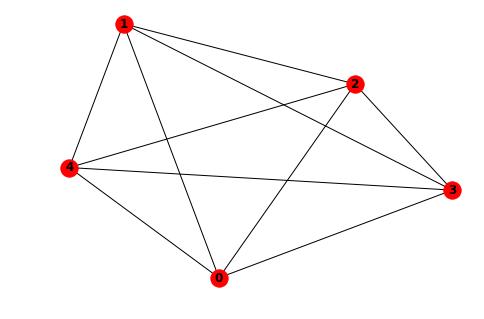

In [16]:
edges = [
    (0, 1, 4),
    (0, 2, 8),
    (0, 3, 9),
    (0, 4, 12),
    
    (1, 2, 6),
    (1, 3, 8),
    (1, 4, 9),
    
    (2, 3, 10),
    (2, 4, 11),
    
    (3, 4, 7)
]

G = nx.Graph()
G.add_weighted_edges_from(edges)
nx.draw(G, with_labels=True, font_weight='bold')

In [12]:
twice_around(G)

([0, 1, 2, 3, 4, 0], 39)

In [18]:
christofides(G)

([0, 1, 3, 4, 2, 0], 28)

In [15]:
# max_e = sorted(sub_G.edges(data=True),key= lambda x: x[2]['weight'],reverse=True)[0][2]['weight']
# max_e